# QAOA 
# (Quantum Approximate Optimazation Algorithm: 量子近似最適化アルゴリズム)

## 概要

　量子コンピュータで最適化というと、量子アニーラーのイメージが強いが、ゲート型でも特定の最適化問題は解くことができる。QAOAとは、そんなゲート型量子コンピュータを用いて、組み合わせ最適化問題(最適な組み合わせを選ぶ、最適化問題の一種)の解を求めるためのアルゴリズムである。

## 目的
$z = z_{1}z_{2}\cdots z_{n}(x\in \{0,1\}^{n})$で表記されるビット列zに関して、とある条件を満たせば
$C_{\alpha}=1\,otherwise\, C_{\alpha}=0$を満たす関数$C_{\alpha}$について、$C(z) = \sum_{\alpha=0}^m C_{\alpha}(z)$を最大化させることが目的である。

これを最大化させるのには２つの変分量子ゲートが必要である。
$$U(C,\gamma) = e^{-i\gamma C} = \prod_{\alpha =1}^m e^{-i\gamma C_{\alpha}} \\
 U(B,\beta) = e^{-i\beta B} = \prod_{j =1}^n e^{-i\beta {\sigma_{x}}^{j}}$$
 
 $|s\rangle = \frac{1}{\sqrt{2}^{n}}\sum_{z=0}^{2^{n}-1} |z\rangle$、
 $|{\bf \gamma, \,\beta}\rangle = U(B,\beta_{p})U(C,\gamma_{p}) \cdots U(B,\beta_{1})U(C,\gamma_{1})|s\rangle$とすると、$F_{p} = \langle{\bf \gamma, \,\beta}|C|{\bf \gamma, \,\beta}\rangle$の最大値、$M_{p} = \underset{{\bf \gamma, \,\beta}}{max}F_{p}$を求める。[1]

# 他のアルゴリズムとの関係

## 1.量子アニーリング

量子アニーリングとは、量子力学を用いた、組み合わせ最適化問題の解の導出に特化した機械である。量子アニーリングはコスト関数(イジングモデル)を最小化する手法である。コスト関数は以下のように定式化される。[2]

$$H = -\sum_{i<j}^{} J^{ij}s_i s_j - \sum_{i}^{} h^{i}s_i$$ 

$J^{ij}$と$h^{i}$は定数で、$s_i$と$s_j$は$1$か$-1$の2値パラメータである。QAOAでは全ての量子ビットに$H$ゲートを掛けて重ね合わせ状態を作った上で$Z$ゲートを当てはめることで$s_i$と$s_j$を表している。

## 2. 量子断熱計算(QAA) 

ハミルトニアン・・・系全体のエネルギー

これは、求めたい状態を基底状態に持つコストハミルトニアン$H_{cost}$を準備し、自明の基底状態をもつリファレンスハミルトニアン$H_{ref}$から移動させることで得たい答えを導く手法である。

具体的には、全体のハミルトニアン$H$を
$H(t) = (1-\frac{t}{T})H_{ref} + \frac{t}{T}H_{cost} $
と定式化し、$t \rightarrow T$と変化させる[3]

## QAOAの数学的な解説

以下のシュレディンガー方程式を解くとする。

$$ -i\frac{\partial}{\partial t}|\psi\rangle = H(t)|\psi\rangle$$

この解は[2]より以下のように表される。
$$U(t) = \exp(-i\int H(t) \partial t) = \exp(-iH(t)\partial t) \cdot \exp(-iH(t - \partial t)\partial t) \cdots 
         \exp(-iH(\partial t)\partial t)\exp(-iH(0)\partial t)$$
         
また、トロッター展開により、$\exp(-iH(\partial t)\partial t) \approx \exp(-i(1-t)\partial t H_{ref})\exp(-it\partial t H_{cost})$と分解できるので、

$$(1-t)\partial t = \beta, t \partial t = \gamma$$とおくと、

$$U(t) = \exp(-i\beta_p H_{ref})\exp(-i\gamma_p H_{cost})\exp(-i\beta_{p-1} H_{ref})\exp(-i\gamma_{p-1} H_{cost}) \cdots \exp(-i\beta_2 H_{ref})\exp(-i\gamma_2 H_{cost})\exp(-i\beta_1 H_{ref})\exp(-i\gamma_1 H_{cost})$$


(${\bf \beta}= \beta_p\beta_{p-1}\cdots\beta_{2}\beta_{1}、{\bf \gamma}= \gamma_p\gamma_{p-1}\cdots\gamma_{2}\gamma_{1}$とおき、$U(t) = |{\bf \beta,\gamma}\rangle$と表されるのが一般的である。)


を$H_{ref}$にかけることで$H_{cost}$の基底状態$\langle{\bf \beta,\gamma}|H_{ref}|{\bf \beta,\gamma}\rangle$が求められる。ちなみに、実装上の$H_{ref}$は全ての量子ビットに$H$ゲートを掛けた重ね合わせ状態である。

# 実装方法


## アルゴリズムの手順

ここでは繰り返し回数が1回の時の手順を示す。繰り返し回数とは、以下のステップ2と3を行う回数を指す。

1. 重ね合わせ状態$|+\rangle^{\otimes n}$を作る。($n$は量子レジスタ数) 

2. 任意の角度$\beta, \gamma$を選び、量子ビットに$U(C,\gamma),U(B,\beta)\,\,(C=H)$を掛ける。

3. $\langle \beta, \gamma |C|\beta, \gamma \rangle$ を最小にする$\beta, \gamma$ を古典コンピュータで求める。

4. 2,3を繰り返し、複数回の試行の中で$\langle \beta, \gamma |H |\beta, \gamma \rangle$が最小になった時の$\beta, \gamma$で1-3を繰り返し、量子レジスタを測定する。　

今回はQAOAを用いて組合せ最適化問題で、NP問題であるMaxcut問題を解いていく。

## Maxcut問題の説明
![220px-Min-cut svg](https://user-images.githubusercontent.com/45162150/54339910-82be2f80-4679-11e9-9b9c-a8eab23e1d2d.png)(引用元[4])　　

Maxcut問題とは、$N$個の頂点を持つ図形を２つに分割する時、分割される辺の数の最大値を求める問題である。[5] 

具体的には、隣り合う頂点のペアの内片方の重みを1,もう片方の重みを-1とすると、

$$ C_{z} = -\frac{1}{2}\sum_{i,j\in N}^{} (1-\sigma^{z}_{i}\sigma^{z}_{j})\,(i \,and\,j\, are\,neighbouring\,vertexes)$$を最大化する問題である。　

## 実装
それではQAOAを実装して長方形(頂点が４つの図形)のmaxcut問題を解いてみよう。

(図形の例)

![Screen Shot 2019-04-03 at 9 55 13 AM](https://user-images.githubusercontent.com/45162150/55445503-aa5c4400-55f6-11e9-8083-ac0c5fc6d7c6.png)

なお、ここでは株式会社Qunasysが開発してる量子シミュレータQulacsを用いた。

In [1]:
#必要なライブラリをインポートする
from qulacs import QuantumState,QuantumCircuit,ParametricQuantumCircuit,Observable
from qulacs.gate import H,CNOT,RX,RZ,DenseMatrix
from qulacs.state import inner_product
from scipy.optimize import minimize
from scipy.linalg import expm
import numpy as np

この場合、$C_z$は以下のように定式化される。

$C_z = -\frac{1}{2}(1-Z_{0}Z_{1})-\frac{1}{2}(1-Z_{1}Z_{2})-\frac{1}{2}(1-Z_{2}Z_{3})-\frac{1}{2}(1-Z_{3}Z_{1})\\
\,\,=\frac{1}{2}(Z_{0}Z_{1}+Z_{1}Z_{2}+Z_{2}Z_{3}+Z_{3}Z_{1})-2$

ここから、第1項のみを最小化すれば目的関数$C_z$が最小になることが分かる。第1章でも出てきたPythonライブラリSympyを用いてこれらの演算子のテンソル積を求めよう。

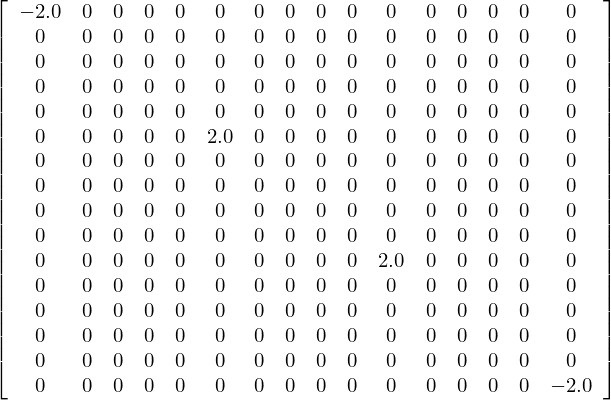

In [2]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE
init_printing()

#目的関数を行列の形で求める
represent(Z(0)*Z(1)+Z(1)*Z(2)+Z(2)*Z(3)+Z(3)*Z(0),nqubits=4)*(-1/2)

In [3]:
#目的関数
Hamiltonian = np.array([[ -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],\
                        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2]])

# ゲートの実装の仕方

${\large U(C_{z},\gamma) = e^{-i\gamma C_{z}} = e^{-i\gamma \frac{1}{2}(Z_{0}Z_{1}+Z_{1}Z_{2}+Z_{2}Z_{3}+Z_{3}Z_{1})}}$は,${\large e^{-i\frac{\theta}{2}\sigma^{z}_{i}\sigma^{z}_{j}}}$の集まりであり、これは量子状態を以下のように変化させる。

$|x_1\rangle = \alpha_0 |0\rangle + \alpha_1|0\rangle \,,\,|x_2\rangle = \beta_0 |0\rangle + \beta_1|0\rangle 
$

とすると、

$
|x_1x_2\rangle = 
\alpha_{0}\beta_{0}|00\rangle
+\alpha_{0}\beta_{1}|01\rangle
+\alpha_{1}\beta_{0}|10\rangle
+\alpha_{1}\beta_{1}|11\rangle \\
\xrightarrow{\large{e^{-i\frac{\theta}{2}\sigma^{z}_{0}\sigma^{z}_{1}}}}
\alpha_{0}\beta_{0}{\large{e^{-i\frac{\theta}{2}}}}|00\rangle
+\alpha_{0}\beta_{1}{\large{e^{i\frac{\theta}{2}}}}|01\rangle
+\alpha_{1}\beta_{0}{\large{e^{i\frac{\theta}{2}}}}|10\rangle
+\alpha_{1}\beta_{1}{\large{e^{-i\frac{\theta}{2}}}}|11\rangle
$

下の回路を実装すれば同じように変化させられる。[6]

$
|x_1x_2\rangle = 
\alpha_{0}\beta_{0}|00\rangle
+\alpha_{0}\beta_{1}|01\rangle
+\alpha_{1}\beta_{0}|10\rangle
+\alpha_{1}\beta_{1}|11\rangle 
$

$
\xrightarrow{CNOT} 
\alpha_{0}\beta_{0}|00\rangle
+\alpha_{0}\beta_{1}|01\rangle
+\alpha_{1}\beta_{0}|11\rangle
+\alpha_{1}\beta_{1}|10\rangle 
$

$
\xrightarrow{I\otimes R_Z(\theta)} 
 \alpha_{0}\beta_{0}{\large{e^{-i\frac{\theta}{2}\sigma^{z}_{2}}}}|00\rangle
+\alpha_{0}\beta_{1}{\large{e^{-i\frac{\theta}{2}\sigma^{z}_{2}}}}|01\rangle
+\alpha_{1}\beta_{1}{\large{e^{-i\frac{\theta}{2}\sigma^{z}_{2}}}}|10\rangle
+\alpha_{1}\beta_{0}{\large{e^{-i\frac{\theta}{2}\sigma^{z}_{2}}}}|11\rangle
$

$
=\alpha_{0}\beta_{0}{\large{e^{-i\frac{\theta}{2}}}}|00\rangle
+\alpha_{0}\beta_{1}{\large{e^{i\frac{\theta}{2}}}}|01\rangle
+\alpha_{1}\beta_{1}{\large{e^{i\frac{\theta}{2}}}}|10\rangle
+\alpha_{1}\beta_{0}{\large{e^{-i\frac{\theta}{2}}}}|11\rangle
$

$
\xrightarrow{CNOT} 
\alpha_{0}\beta_{0}{\large{e^{-i\frac{\theta}{2}}}}|00\rangle
+\alpha_{0}\beta_{1}{\large{e^{i\frac{\theta}{2}}}}|01\rangle
+\alpha_{1}\beta_{0}{\large{e^{i\frac{\theta}{2}}}}|10\rangle
+\alpha_{1}\beta_{1}{\large{e^{-i\frac{\theta}{2}}}}|11\rangle
$

よって、量子ビットのペア$(i\,,\,j)$に対して$CNOT(i,j)$、$RX(2\gamma)$、$CNOT(i,j)$をかければいい。

$U(B,\beta)$に関しては、

$ U(B,\beta) = e^{-i\beta B} = \prod_{j =1}^n e^{-i\beta {\sigma_{x}}^{j}}= \prod_{j =1}^n e^{-i\beta {\sigma_{x}}^{j}} = \prod_{j =1}^n e^{-i \frac{{\sigma_{x}}^{j}}{2} \cdot 2\beta} = RX(2\beta)\,\,{\small[7]}$

なので、各量子ビットに$RX(2\beta)$をかければいいことが分かる。

それではコードを見ていこう。

In [16]:
#頂点の数　第(1)量子ビットを頂点qと対応させる (1 ≤ q ≤ 4, qは自然数)
n = 4 
state = QuantumState(n)
state.set_zero_state()

circuit = QuantumCircuit(n)

#U(C,γ)
def gamma_gate(i,j,gamma):
    circuit.add_CNOT_gate(i,j)
    circuit.add_gate(RZ(j,gamma*2))
    circuit.add_CNOT_gate(i,j)
    
#U(B,β)    
def beta_gate(i,beta):
    circuit.add_gate(RX(i,beta*2))

#<β1,γ1|Cz|γ1,β1>の整数部分を出力(複素数では最小化できないから)
def observable(x):  
    for i in range(n):
        circuit.add_H_gate(i)

    for i in range(n):
        gamma_gate(i,(i+1)%2,x[0])
        beta_gate(i,x[1])
                     
    circuit.update_quantum_state(state)
    state_buf = QuantumState(n)
    state_buf.load(state)
                     
    O = DenseMatrix([i for i in range(n)], Hamiltonian)
    O.update_quantum_state(state)
    comp = inner_product(state, state_buf)
    return comp.real                 

x0 = np.array([0,0])    
opt = {'maxiter':500}

#最適化法のPowell法を用いて<β1,γ1|Cz|γ1,β1>が最小になる(γ1,β1)の組を求める
minimum = minimize(observable, x0, options=opt,method='powell')
print(minimum)

   direc: array([[1., 0.],
       [0., 1.]])
     fun: array(-54588.75858666)
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 2
  status: 0
 success: True
       x: array([ 0.96989496, -6.75905257])


$C_z$を最大化 ($\langle \beta,\gamma|C_z|\gamma,\beta \rangle$の整数部分を最小化) する($\gamma,\beta$)の組が求まったので、これらの値を実際に当てはめて各状態が取りうる確率を求める。

In [17]:
m = 4
state = QuantumState(m)
state.set_zero_state()

circuit = QuantumCircuit(m)

for i in range(m):
    circuit.add_H_gate(i)

for i in range(n):
    gamma_gate(i,(i+1)%2,minimum.x[0])
    beta_gate(i,minimum.x[1])
    
circuit.update_quantum_state(state) 
#状態ベクトルの整数部分の2乗を求める
print((state.get_vector().real)**2)

[0.00100312 0.00319764 0.00319764 0.06448456 0.02620647 0.18453575
 0.0012607  0.02620647 0.02620647 0.0012607  0.18453575 0.02620647
 0.06448456 0.00319764 0.00319764 0.00100312]


<BarContainer object of 16 artists>

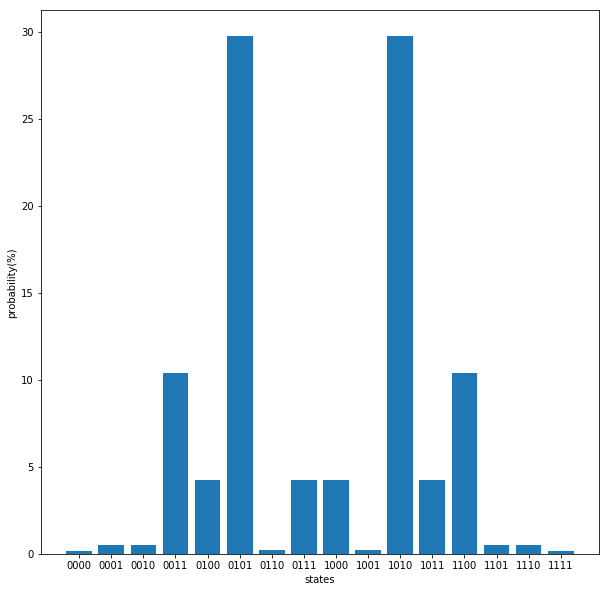

In [18]:
import matplotlib.pyplot as plt

#量子状態
states = np.array([format(i,"b").zfill(4) for i in range(len(state.get_vector()))])

#量子状態ごとの状態ベクトルの2乗
squared_overlap = np.array([(state.get_vector()[i].real)**2 for i in range(len(state.get_vector()))])

#量子状態ごとの状態ベクトルの2乗から確率を計算
probability = [squared_overlap[i]/sum(squared_overlap)*100 for i in range(len(state.get_vector()))]

plt.figure(figsize=(10, 10))
plt.xlabel("states")
plt.ylabel("probability(%)")
plt.bar(states, probability)

結果から$|0101\rangle$と$|1010\rangle$の確率が共に高いことが分かった。これは頂点1と頂点3、頂点2と頂点4が同じグループになるので以下のように分割される。

![Screen Shot 2019-04-03 at 9 55 13 AM copy](https://user-images.githubusercontent.com/45162150/55445569-f4452a00-55f6-11e9-87bf-b4a94bfd1c49.png)

よってこの時、図形を分割する曲線が横切る辺の数は4本であり、この図形を分割する時に通る辺の数の最大値である。

また、イテレーション回数を2回に変えて実装してみた。

In [14]:
#p = 2

n_2 = 4 
state2 = QuantumState(n_2)
state2.set_zero_state()

circuit = QuantumCircuit(n_2)


def gamma_gate(i,j,gamma):
    circuit.add_CNOT_gate(i,j)
    circuit.add_gate(RZ(j,gamma*2))
    circuit.add_CNOT_gate(i,j)
    
def beta_gate(i,beta):
    circuit.add_gate(RX(i,beta*2))

#<β2,γ2,β1,γ1|Cz|γ1,β1,γ2,β2>の整数部分を出力(複素数では最小化できないから)    
def observable(x):  
    for i in range(n_2):
        circuit.add_H_gate(i)

    for i in range(n_2):
        gamma_gate(i,(i+1)%2,minimum.x[0])
        beta_gate(i,minimum.x[1])
        gamma_gate(i,(i+1)%2,x[0])
        beta_gate(i,x[1])
                     
    circuit.update_quantum_state(state2)
    state_buf2 = QuantumState(n_2)
    state_buf2.load(state2)
                     
    O = DenseMatrix([i for i in range(n_2)], Hamiltonian)
    O.update_quantum_state(state2)
    comp = inner_product(state2, state_buf2)
    return comp.real                 

x0 = np.array([0,0])    
opt = {'maxiter':500}

#最適化法のPowell法を用いて<β2,γ2,β1,γ1|Cz|γ1,β1,γ2,β2>が最小になる(γ2,β2)の組を求める
minimum2 = minimize(observable, x0, options=opt,method='powell')

m_2 = 4
state_2 = QuantumState(m_2)
state_2.set_zero_state()

circuit = QuantumCircuit(m_2)

for i in range(m_2):
    circuit.add_H_gate(i)

for i in range(m_2):
    gamma_gate(i,(i+1)%2,minimum.x[0])
    beta_gate(i,minimum.x[1])
    gamma_gate(i,(i+1)%2,minimum2.x[0])
    beta_gate(i,minimum2.x[1])
    
circuit.update_quantum_state(state_2) 

イテレーション1回の時と2回の時の確率を比べよう。

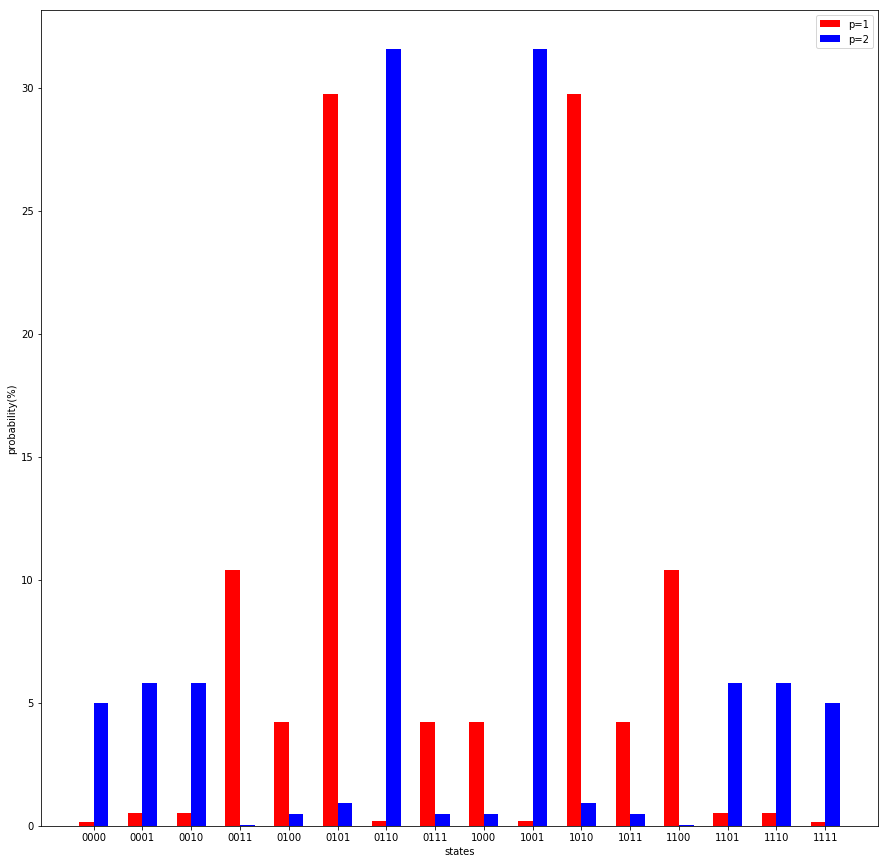

In [15]:
#量子状態
states = np.array([format(i,"b").zfill(4) for i in range(len(state.get_vector()))])

#量子状態ごとの状態ベクトルの2乗
squared_overlap = np.array([(state.get_vector()[i].real)**2 for i in range(len(state.get_vector()))])

#量子状態ごとの状態ベクトルの2乗から確率を計算
probability = [squared_overlap[i]/sum(squared_overlap)*100 for i in range(len(state.get_vector()))]

#量子状態
states2 = np.array([format(i,"b").zfill(4) for i in range(len(state_2.get_vector()))])

#量子状態ごとの状態ベクトルの2乗
squared_overlap2 = np.array([(state_2.get_vector()[i].real)**2 for i in range(len(state_2.get_vector()))])

#量子状態ごとの状態ベクトルの2乗から確率を計算
probability2 = [squared_overlap2[i]/sum(squared_overlap2)*100 for i in range(len(state_2.get_vector()))]

w = 0.3

X1 = np.arange(len(states)) 
X2 = np.arange(len(states2))

plt.figure(figsize=(15, 15))

plt.xlabel("states")

plt.ylabel("probability(%)")

# 2012年のデータを青で表示
plt.bar(X1, probability, color='r', width=w, label='p=1', align="center")

# 2013年のデータを緑で表示
plt.bar(X2 + w, probability2, color='b', width=w, label='p=2', align="center")

# 凡例を表示
plt.legend(loc="best")

# X軸の目盛りを書き換える
plt.xticks(X1 + w/2, states)

plt.show()

これで、1回イテレーションした時は$|0101\rangle \,,\,|1010\rangle$が出る確率が1番高かった。これらの量子状態は横切る辺の数が4本の切り方である。それに対し、2回イテレーションした時は代わりに$|0110\rangle \,,\,|1001\rangle$が1番高くなった。これらは横切る辺の数が2本でなるが、以下のように4本横切ることもできるので、正解が出る確率が高くなったと言える。

![Screen Shot 2019-04-03 at 9 55 13 AM copy](https://user-images.githubusercontent.com/45162150/55445748-c01e3900-55f7-11e9-8f66-b6f20d5cf8dc.png)

2回目の方が1回目より正答率が高いのは、イテレーション回数の少なさが制約条件になっているからだと考えられる。

[1]によると、$F_{p} = \langle{\bf \gamma, \,\beta}|C|{\bf \gamma, \,\beta}\rangle$の最大値は$M_{p} = \underset{{\bf \gamma, \,\beta}}{max}F_{p}$であり、イテレーション回数pを無限にすると $\lim_{p \to \infty}M_p = \max_z C_z$と目的関数の最大値が得られる。

このことから、
$$M_{p-1}＝\langle{\bf \gamma_{p-1}, \,\beta_{p-1}, \cdots \gamma_{1} \,\beta_{1}}|C|{\bf \gamma_{1}, \, \beta_{1} \cdots \gamma_{p-1}, \,\beta_{p-1}}\rangle = \langle{\bf 0,0,\gamma_{p-1}, \,\beta_{p-1}, \cdots \gamma_{1} \,\beta_{1}}|C|{\bf \gamma_{1}, \, \beta_{1} \cdots \gamma_{p-1}, \,\beta_{p-1},0,0}\rangle < \langle{\bf \gamma_{p}, \,\beta_{p},\gamma_{p-1}, \,\beta_{p-1}, \cdots \gamma_{1} \,\beta_{1}}|C|{\bf \gamma_{1}, \, \beta_{1} \cdots \gamma_{p-1}, \,\beta_{p-1}}\rangle = \langle{\bf 0,0,\gamma_{p-1}, \,\beta_{p-1}, \cdots \gamma_{1} \,\beta_{1}}|C|{\bf \gamma_{1}, \, \beta_{1} \cdots \gamma_{p-1}, \,\beta_{p-1},\gamma_{p}, \,\beta_{p}}\rangle = M_{p}$$

よって、イテレーション回数が$p-1$回の目的関数は$p$回で本来最適化できるパラメータ$\gamma_{p}\,,\,\beta_{p}$が0の状態なので、この条件下で$2p$個のうち$2p-2$個のパラメータしか最適化できてないからだと考えられる。[7]

参考文献

[1]E. Farhi, J. Goldstone, and S. Gutmann, (2014),arXiv:1411.4028.

[2]BrainPad(April 20, 2017) 物理のいらない量子アニーリング部門,Retrieved from http://blog.brainpad.co.jp/entry/2017/04/20/160000

[3]@snhrhdt(January 29th, 2019) QAOA - ゲート式量子コンピューターで最適化問題を解く近似アルゴリズム -Qiita
Retrived from https://qiita.com/snhrhdt/items/ae55a94b25c06142528a

[4]カット(グラフ理論)-Wikipedia,Retrieved from https://ja.wikipedia.org/wiki/カット_(グラフ理論)#最大カット

[5]株式会社NTTデータ数理システム, 2.23 隣接行列（最大カット問題） - NTTデータ数理システム, 
Retrieved from www.msi.co.jp/nuopt/docs/v19/examples/html/02-23-00.html

[6]Qingfeng Wang, Tauqir Abdullah (December 14, 2018). An Introduction to Quantum Approximation Optimization Algorithm, Retrieved from https://www.cs.umd.edu/class/fall2018/cmsc657/projects/group_16.pdf

[7]Eddie Farhi: A Quantum Approximate Optimization Algorithm,
Retrieved from https://www.youtube.com/watch?v=J8y0VhnISi8